
# Homework 2


Spencer Pease  
ASTR 427

--------------------------

In [1]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
# Euler method

def euler(deriv, state, step):
"""
euler is a function that does one step of numerical integration given a state of values and a function
to find how those values change with time. It returns a new set of values one step ahead of the given values.
- deriv: function that evaluates the derivative of the given state
- state: list of values to perfom euler integration on
- step: interval over which to update the given state
- return: updated state
"""
    state = np.array(state)
    
    return state + (step * deriv(state))

In [3]:
# Runge-Kutta

def runge_kutta(deriv, state, step):
"""
runge_kutta is a function that does one step of numerical integration given a state of values and a function
to find how those values change with time. It returns a new set of values one step ahead of the given values.
- deriv: function that evaluates the derivative of the given state
- state: list of values to perfom Runge-Kutta integration on
- step: interval over which to update the given state
- return: updated state
"""
    state = np.array(state)
    
    k1 = step * deriv(state)
    k2 = step * deriv(state + k1/2)
    k3 = step * deriv(state + k2/2)
    k4 = step * deriv(state + k3)
    
    return state + (k1/6 + k2/3 + k3/3 + k4/6)

In [9]:
# Leapfrog

def leapfrog(deriv, state, step):
"""

"""    
    return
    

## Problem 2

Equation to solve:
    
$\frac{d^{2}x}{dt^{2}} + x = 0$

Initial conditions:  
`x(0) = 1`  
`x'(0) = 0`

In [5]:
def deriv(y):
"""
function that, given a list of differential equations, returns a list containing the derivative of each equation
NOTE: this function only works for the differential equation defined above
- y: list of differential equations
- x: point to evaluate derivatives of y at
- return: derivative of each equation in y at point x
"""
    dydx = np.array([y[1], -y[0]])
    return dydx

# List of initial conditions (given in same order as they correspond to x)
# t; dx/dt
# x(0) = 1; x'(0) = 0
initial_state = [1, 0]

# stepsize
step = .03

# integration range
t = [0, 30]

In [6]:
# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Euler's method
while index <= t[1]:
    
    new_state = euler(deriv, state, step)
    state = new_state
    index += step

print "Numerical result via Euler's method with a", step, "step size:", state[0]

Numerical result via Euler's method with a 0.03 step size: 0.227920346306


This method is not very accurate above a .01 step size

In [7]:
# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Runge-Kutta
while index <= t[1]:
    
    new_state = runge_kutta(deriv, state, step)
    state = new_state
    index += step

print "Numerical result via Runge-kutta with a", step, "step size:", state[0]

Numerical result via Runge-kutta with a 0.03 step size: 0.154251249095


This method is not very accurate above a .3 step size

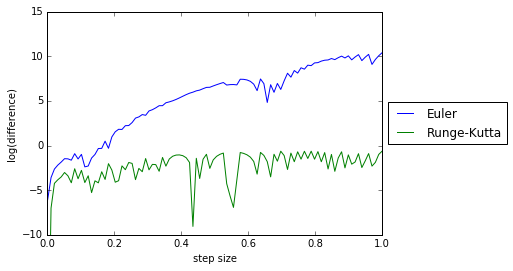

In [8]:
#2b

def test_step(method, deriv, initial_state, interval, step):
"""
test_step is a function created to perform numerical integration for various step sizes.
- method: numerical integration function that takes in parameters of deriv, state, and step
- deriv: function that evaluates the derivative of the given state
- initial_state: list of numbers defining the state at which to start evaluation
- interval: list containing the beginning and end points of the interval over which to do integration
- step: rate at which integration is perfomed over the interval
- retrun: numerical integration value defined by the above parameters
"""
    index = interval[0]
    state = initial_state

    while index <= interval[1]:
        new_state = method(deriv, state, step)
        state = new_state
        index += step

    return state[0]

# range of step values to test
h = np.linspace(.001, 1, 100)

# list of integration results for varying step values
e_result = []
rk_result = []
for j in h:
    e_result.append(test_step(euler, deriv, initial_state, t, j))
    rk_result.append(test_step(runge_kutta, deriv, initial_state, t, j))

# difference between numerical integration and the analytical result for varying step values
e_result = np.array(e_result) - np.cos(30)
rk_result = np.array(rk_result) - np.cos(30)

# plotting
plt.xlim(0, 1)
plt.ylim(-10, 15)
plt.plot(h, np.log(np.absolute(e_result)), label='Euler')
plt.plot(h, np.log(np.absolute(rk_result)), label='Runge-Kutta')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('step size')
plt.ylabel('log(difference)')
plt.show()


## Problem 3